In [1]:
# Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,ShuffleSplit
from sklearn import svm
import sys
# sys.path.append('/home/ralfahad/PythonUtility/PTE')
# from PhaseTE_MF import PhaseTE_MF
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import warnings
from sklearn import svm, metrics,preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc,classification_report
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import norm
# from sklearn import metrics
# import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#Load the metadata
path="/home/sultan/EEG_CP/WAVELET_SPECTROGRAM/Features_data/Induced_100sam_all.csv"
# path="/home/sultan/EEG_CP/WAVELET_SPECTROGRAM/Features_data/Induced_100sam_percep_300msall.csv"
# path="/home/sultan/EEG_CP/WAVELET_SPECTROGRAM/Evoked_75_Tk153.csv"
# path="/home/sultan/EEG/Source_level_frequency_analysis/100_base_corr_sam_NHIerp_band_features_clear.csv"
Metadata=pd.read_csv(path)
Metadata.head(2)

,Unnamed: 0,Unnamed: 0.1,label,0,1,2,3,4,5,6,...,262,263,264,265,266,267,268,269,270,271
0,0,0,1.0,1.964936e-09,1.928388e-09,1.701437e-09,1.656722e-09,1.109889e-09,1.170539e-09,1.176241e-09,...,1.074466e-10,1.000316e-10,2.955365e-10,4.385043e-10,1.270773e-10,1.796374e-10,6.200673e-10,6.660438e-10,2.558787e-10,4.117513e-10
1,1,1,1.0,1.200782e-09,1.496507e-09,1.582692e-09,1.542738e-09,9.867382e-10,9.453885e-10,9.544713e-10,...,9.584748e-11,9.307005e-11,3.271358e-10,3.893210e-10,1.344969e-10,1.535037e-10,6.268894e-10,6.351566e-10,2.779621e-10,3.527328e-10


In [3]:
# random state; 
rs=18

### For aging data 

In [4]:
X=Metadata.iloc[:,3:]
y=Metadata.iloc[:,2].values
# y=Metadata['label']
# X.shape,y.shape

In [5]:
# X.head(5)
# y

### For CP data

In [6]:
# Metadata=Metadata1.rename(columns={'0':'label'})
# X=Metadata.iloc[:,2:]; ## here we take it out the basebline zero values, which is upto 70 index
# y=Metadata['label']
# X.shape,y.shape

# Apply SVM on Data

In [7]:
gamma_range = np.logspace(-2, 2, 5)
gamma_range

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [8]:
from sklearn import preprocessing
# X=preprocessing.scale(X)
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
print X.shape,y.shape
from sklearn.preprocessing import label_binarize
y=label_binarize(np.asarray(y),[0,1])

#C_range = np.logspace(-2, 10, 13)
# gamma_range = np.logspace(-2, 2, 5)
gamma_range = [0.01,0.002,0.00069,0.0007,0.0005]
C_range = np.logspace(-2, 2, 5)
#gamma_range = np.logspace(-2, 2, 5)

print C_range,gamma_range


(2880, 272) (2880,)
[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02] [0.01, 0.002, 0.00069, 0.0007, 0.0005]


## here I disable the l-15 clf_tune.....

In [9]:
#Classifiaction:
# #Splitting
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=rs)
cv = ShuffleSplit(X_train.shape[0], test_size=0.20, random_state=rs)

# Define Classifier
svr = svm.SVC(kernel='rbf')

# Deffine tuning parameter
C_range = np.logspace(-2, 2, 5)
# gamma_range = np.logspace(-2, 2, 5)
gamma_range = [0.01,0.002,0.00069,0.0007,0.0005]
param_grid = dict(gamma=gamma_range, C=C_range)
# clf_Tune = GridSearchCV(estimator=svr, cv=5, param_grid=param_grid,n_jobs=-1, verbose=True)
# clf_Tune.fit(X_train,y_train)
# print 'Finish tuning'      

# Find Significant correlation with stability selections 

### Preprocessing of dataset with binarize the label

In [10]:
# Pre Processing 
X[0,:10]

array([4.40012983, 1.0227934 , 0.85987283, 0.62346286, 0.83781663,
       1.00384048, 1.17929494, 0.47137853, 0.54280598, 1.4201062 ])

In [11]:
from sklearn import preprocessing
X=preprocessing.scale(X)
# scaler = preprocessing.StandardScaler()
# X = scaler.fit_transform(X)
print X.shape,y.shape
from sklearn.preprocessing import label_binarize
y=label_binarize(np.asarray(y),[0,1])

(2880, 272) (2880, 1)


In [12]:
# np.var(X[:,1])

### Randomized Logistic Regression 

In [13]:
from sklearn.linear_model import (RandomizedLasso, lasso_stability_path,LassoLarsCV)
from sklearn.exceptions import ConvergenceWarning

#Model Library
from sklearn.linear_model import (RandomizedLasso, lasso_stability_path, LassoLarsCV)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, RandomizedLogisticRegression
from sklearn import svm

# Performance analysis library 
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut, cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# preprocessing
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split # test train split
from sklearn.model_selection import ShuffleSplit

In [14]:
with warnings.catch_warnings():
    #warnings.simplefilter('ignore', UserWarning)
    warnings.simplefilter('ignore', ConvergenceWarning)
    lars_cv = LassoLarsCV(cv=5).fit(X, y)
# print lars_cv.alpha_
# lars_cv.alphas_

In [15]:
# Run the RandomizedLasso: we use a paths going down to .1*alpha_max
# to avoid exploring the regime in which very noisy variables enter
# the model
alphas = np.linspace(lars_cv.alphas_[0], .1 * lars_cv.alphas_[0], 10)
print alphas
clf = RandomizedLasso(alpha=alphas,random_state=rs,max_iter=1000).fit(X, y)

[0.00276769 0.00249092 0.00221415 0.00193738 0.00166061 0.00138384
 0.00110708 0.00083031 0.00055354 0.00027677]


In [16]:
# clf.scores_

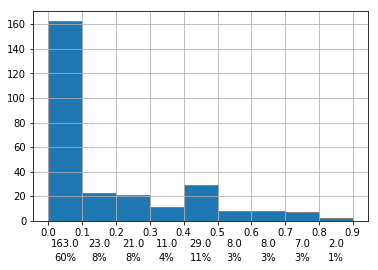

In [17]:
from matplotlib.ticker import FormatStrFormatter
data=clf.scores_
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(data,bins=np.round(0.1*np.arange(0,10),2) ,edgecolor='gray')

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)

# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))


# Label the raw counts and the percentages below the x-axis...
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    # Label the raw counts
    ax.annotate(str(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -32), textcoords='offset points', va='top', ha='center')


# Give ourselves some more room at the bottom of the plot
plt.subplots_adjust(bottom=0.15)
plt.grid(True)
plt.show()

### Find the optimal threshold

In [18]:
bins

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [19]:
Th_2_Bins_Index= np.where((bins<=1.0) & (bins>=0.0)) # take the bins within a range
# print Th_2_Bins_Index
print bins
Th_2_Bins=bins[Th_2_Bins_Index]
print Th_2_Bins

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [20]:
from sklearn import preprocessing
X=preprocessing.scale(X)
print X.shape,y.shape
from sklearn.preprocessing import label_binarize
y=label_binarize(np.asarray(y),[0,1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
print X_train.shape, X_test.shape, y_train.shape, y_test.shape

(2880, 272) (2880, 1)
(2304, 272) (576, 272) (2304, 1) (576, 1)


In [21]:
X_train[:,1:10]

array([[ 1.79434265,  2.13942648,  2.99925342, ...,  1.05168763,
         1.68079726,  0.1368292 ],
       [ 0.52560323,  1.49341718,  1.08851088, ...,  1.92389039,
         0.72374052,  0.53842273],
       [ 0.49621891,  0.37194101,  0.4360478 , ..., -0.17878066,
        -0.32021022,  0.11657461],
       ...,
       [-0.16052078,  0.7571082 ,  0.85636375, ..., -0.49709495,
        -0.55790828, -0.24700109],
       [ 0.10358713,  0.42660746,  0.60002852, ...,  1.44443175,
         0.24458388,  0.45214362],
       [-0.81819083, -0.983479  , -0.77654309, ..., -0.47853981,
        -0.62572392, -1.12484379]])

In [22]:
type(X_train)#[:,np.squeeze(np.asarray(np.where(clf.scores_>=0.16)))].shape#,y_train

numpy.ndarray

In [23]:
# C_range = np.logspace(-2, 2, 5)
C_range = [1,2,4,6,8,10,12,15,16,20,30,40,100]
gamma_range = [0.01,0.002,0.00069,0.0007,0.0005]
# gamma_range = np.logspace(-2, 2, 5)
param_grid = dict(gamma=gamma_range, C=C_range)
#clf_Tune = GridSearchCV(estimator=svr, cv=1, param_grid=param_grid,n_jobs=-1)
clf_Tune = GridSearchCV(estimator=svr, cv=5, param_grid=param_grid,n_jobs=-1, verbose=True)
clf_Tune.fit(X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=Th_2_Bins[0])))],y_train)

Fitting 5 folds for each of 65 candidates, totalling 325 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 325 out of 325 | elapsed:  1.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [1, 2, 4, 6, 8, 10, 12, 15, 16, 20, 30, 40, 100], 'gamma': [0.01, 0.002, 0.00069, 0.0007, 0.0005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [24]:
# use tuned parameter on to get model
y_p = clf_Tune.best_estimator_.predict(X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=Th_2_Bins[0])))])

print accuracy_score(y_test, y_p)

0.9809027777777778


In [25]:
# #Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
#cv = ShuffleSplit(X_train.shape[0], test_size=0.2, random_state=rs)

# Define Classifier
svr = svm.SVC(kernel='rbf')

# Deffine tuning parameter
# C_range = np.logspace(-2, 10, 13)
# gamma_range = np.logspace(-9, 3, 13)

C_range = np.logspace(-2, 2, 5)
gamma_range = [1,0.5, 0.25,0.01,0.002]
# gamma_range = [0.01,0.002,0.0006,0.0007]
# gamma_range = [0.1,0.01,0.002,0.0005,0.0006,0.0007,]
# C_range = [20, 30,50]
# C_range=[1000,1500]
# C_range = [1,2,4,6,8,10,12,15,16,20,30,40,100]
# gamma_range = [0.01,0.015, 0.018, 0.002,0.003,0.0004, 0.0005,0.0006,0.0007]; # 0.0007=1/1428 1428 = no. of features
# gamma_range = np.logspace(-2, 2, 5)
param_grid = dict(gamma=gamma_range, C=C_range)
#clf_Tune = GridSearchCV(estimator=svr, cv=1, param_grid=param_grid,n_jobs=-1)
clf_Tune = GridSearchCV(estimator=svr, cv=5, param_grid=param_grid,n_jobs=-1, verbose=True)
##  Define LeaveOneOutCrossValidation
#loocv = LeaveOneOut()
ACC_Th2=[]
AUC_Th2=[]
SV=[]
Bins=[]
Fsc=[]
for i in Th_2_Bins:
    print i
    try:
        print X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape
        
        #Hyper parameter Tuning 
        clf_Tune.fit(X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))],y_train)
        print X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape ,y_train.shape
        print 'Finish tuning'
        print clf_Tune.best_estimator_

        # use tuned parameter on to get model
        y_p = clf_Tune.best_estimator_.predict(X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))])

        ACC_Th2_T=accuracy_score(y_test, y_p)
        fpr, tpr, thresholds = metrics.roc_curve(y_test,y_p)
        AUC_Th2_T=metrics.auc(fpr, tpr)
        perf=classification_report(y_test, y_p)
        print 'Shape', X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape
        print 'ACC',ACC_Th2_T,AUC_Th2_T
        SVe=float(len(clf_Tune.best_estimator_.support_vectors_))/X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))].shape[0]
        print SVe
        SV.append(SVe)
#         print 'Report',classification_report(y_test, y_p)
        ACC_Th2.append(ACC_Th2_T)
        AUC_Th2.append(AUC_Th2_T)
        Fsc.append(perf)
        Bins.append(i)
    except:
        print 'error at:',i
    # false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_p)
    # roc_auc_T = auc(false_positive_rate, true_positive_rate)
    # print 'AUC',roc_auc_T
    # AUC_Th2.append(roc_auc_T)

0.0
(2304, 272)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  1.7min finished


(2304, 272) (2304, 1)
Finish tuning
SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.002, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (576, 272)
ACC 0.9756944444444444 0.9757173860622137
0.300347222222
0.1
(2304, 109)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   41.7s finished


(2304, 109) (2304, 1)
Finish tuning
SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.002, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (576, 109)
ACC 0.9722222222222222 0.97222088256571
0.19140625
0.2
(2304, 86)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   34.7s finished


(2304, 86) (2304, 1)
Finish tuning
SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.002, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (576, 86)
ACC 0.96875 0.968748492886424
0.185763888889
0.3
(2304, 65)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   29.1s finished


(2304, 65) (2304, 1)
Finish tuning
SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.002, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (576, 65)
ACC 0.9600694444444444 0.9601036894140342
0.190538194444
0.4
(2304, 54)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   25.3s finished


(2304, 54) (2304, 1)
Finish tuning
SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.002, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (576, 54)
ACC 0.9565972222222222 0.9566071859175307
0.138020833333
0.5
(2304, 25)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   16.7s finished


(2304, 25) (2304, 1)
Finish tuning
SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (576, 25)
ACC 0.9270833333333334 0.9271039305522065
0.223090277778
0.6
(2304, 17)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   15.6s finished


(2304, 17) (2304, 1)
Finish tuning
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (576, 17)
ACC 0.8645833333333334 0.864673257776706
0.425347222222
0.7
(2304, 9)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   13.7s finished


(2304, 9) (2304, 1)
Finish tuning
SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (576, 9)
ACC 0.7725694444444444 0.7726428743670123
0.561631944444
0.8
(2304, 2)
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   12.8s finished


(2304, 2) (2304, 1)
Finish tuning
SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.002, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Shape (576, 2)
ACC 0.6059027777777778 0.6063539908367495
0.845052083333
0.9
(2304, 0)
Fitting 5 folds for each of 25 candidates, totalling 125 fits
error at: 0.9


In [26]:
for i in range(0,7):
    print ACC_Th2[i] 
    print i
    print (Fsc[i])

0.9756944444444444
0
             precision    recall  f1-score   support

          0       0.97      0.98      0.98       286
          1       0.98      0.97      0.98       290

avg / total       0.98      0.98      0.98       576

0.9722222222222222
1
             precision    recall  f1-score   support

          0       0.97      0.97      0.97       286
          1       0.97      0.97      0.97       290

avg / total       0.97      0.97      0.97       576

0.96875
2
             precision    recall  f1-score   support

          0       0.97      0.97      0.97       286
          1       0.97      0.97      0.97       290

avg / total       0.97      0.97      0.97       576

0.9600694444444444
3
             precision    recall  f1-score   support

          0       0.96      0.97      0.96       286
          1       0.97      0.96      0.96       290

avg / total       0.96      0.96      0.96       576

0.9565972222222222
4
             precision    recall  f1-score   s

In [27]:
ACC_Th2 

[0.9756944444444444,
 0.9722222222222222,
 0.96875,
 0.9600694444444444,
 0.9565972222222222,
 0.9270833333333334,
 0.8645833333333334,
 0.7725694444444444,
 0.6059027777777778]

In [28]:
Th_2_Bins[4]

0.4

In [29]:
# Need to chage gamma range . It is selecting too many features
# Let 0.34 is our best Thr. TO get the index numer with this thr
fealoc=np.squeeze(np.asarray(np.where(clf.scores_>=Th_2_Bins[4])))
fealoc
# len(fealoc)
# Do you get it? yes > How about number of support of the model?

array([  3,   5,  11,  20,  23,  31,  36,  46,  47,  53,  54,  56,  58,
        65,  68,  71,  76,  79,  80,  82, 106, 116, 122, 128, 129, 134,
       140, 141, 142, 150, 155, 161, 172, 184, 187, 188, 189, 199, 202,
       203, 204, 209, 211, 218, 223, 224, 227, 228, 229, 236, 247, 248,
       263, 267])

In [30]:
# ROI=fealoc%68
# ROI
# np.unique(ROI,return_counts=True)

In [31]:
# len(np.unique(ROI))
# np.unique(ROI,return_counts=True)

In [32]:
# for th in Th_2_Bins:
#     clf_Tune.fit(X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=th)))],y_train)
#     print X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=th)))].shape ,y_train.shape
#     print 'Finish tuning'
#     print float(len(clf_Tune.best_estimator_.support_vectors_))/X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=th)))].shape[0]*100
# # use tuned parameter on to get model
# #y_p = clf_Tune.best_estimator_.predict(X_test[:,np.squeeze(np.asarray(np.where(clf.scores_>=i)))])

In [33]:
# float(len(clf_Tune.best_estimator_.support_vectors_))/X_train[:,np.squeeze(np.asarray(np.where(clf.scores_>=0.25)))].shape[0]*100

In [34]:
# result it overfitting need to be less or equal to 40%

# Rank the Feature Vectors as their importance

## *Here we need to change in "rakfe=bb[bb[:,0]>=Th_2_Bins[5]];"5 means 0.5*

In [35]:
X.shape[1]

272

In [36]:
# Rank the Features according to the importance
names=range(0,X.shape[1]) # Feature names used as 1-1428 features
cn=np.asarray(names) # converted as numpy.ndarray
# print "Features sorted by their score:"
b= sorted(zip(map(lambda x: round(x, 4), clf.scores_), cn), reverse=True)
# print b
bb=np.asarray(b)
rakfe=bb[bb[:,0]>=Th_2_Bins[5]]
# rakfe=bb[bb[:,0]>=.50]
ROIs=rakfe[:,1]%68
print ROIs
print len(ROIs)

[ 0. 23. 36. 46. 25. 59.  5. 14.  3.  7. 14.  5. 48. 24. 14. 67. 52. 32.
 61. 11. 11.  8. 60. 63. 66.]
25


In [37]:
Th_2_Bins[6]

0.6

In [38]:
# # b
# ROIstime=np.floor(rakfe[:,1]/68)
# timeloc=ROIstime*10
# plt.hist(timeloc, bins=20)

In [39]:
# ROI
# print np.unique(ROIs,return_counts=True)
# print len(np.unique(ROIs))

In [40]:
# ROIs

In [41]:
Roiname=pd.read_csv("/home/sultan/EEG/Source_Level_Analysis/DK_atlas_Visualize_index_v1.csv")

In [42]:
nor=81
shdkroi=Roiname['Desikan_Freesurfer_v5.1'] # "Desikan_Freesurfer_v5.1"  is the label of short name columns 
sdk=shdkroi[ROIs]# ROIs is the index of label
# sdk.head(nor)

In [43]:
dkfull=Roiname['BrainMesh_ICBM152.nv']
dk=dkfull[ROIs]
print dk.head(nor)
len(dk.head(nor))

0.0                     bankssts L
23.0            lateraloccipital R
36.0             parsopercularis L
46.0          posteriorcingulate L
25.0        lateralorbitofrontal R
59.0            superiorparietal R
5.0          caudalmiddlefrontal R
14.0            inferiorparietal L
3.0      caudalanteriorcingulate R
7.0                       cuneus R
14.0            inferiorparietal L
5.0          caudalmiddlefrontal R
48.0                  precentral L
24.0        lateralorbitofrontal L
14.0            inferiorparietal L
67.0          transversetemporal R
52.0    rostralanteriorcingulate L
32.0                 paracentral L
61.0            superiortemporal R
11.0                 frontalpole R
11.0                 frontalpole R
8.0                   entorhinal L
60.0            superiortemporal L
63.0               supramarginal R
66.0          transversetemporal L
Name: BrainMesh_ICBM152.nv, dtype: object


25

In [44]:
aa=pd.DataFrame(dk.values[0:nor])
aa.columns=['ROIs']
Toprois=pd.DataFrame(aa.values)
# print Toprois

In [45]:
saa=pd.DataFrame(sdk.values[0:nor])
saa.columns=['short ROIs']
sToprois=pd.DataFrame(saa.values)
# print sToprois

In [46]:
nor1=75
sc=pd.DataFrame(bb[0:nor1,0])
sn=pd.concat([Toprois,sToprois,sc],axis=1)
sn.columns=['Fullname','ROIs short name', ' Feature score'] # sn: score and roi
# ddd=pd.DataFrame(bb[0:16,0],sToprois)
sn

,Fullname,ROIs short name,Feature score
0,bankssts L,lBKS,0.865
1,lateraloccipital R,rLO,0.805
2,parsopercularis L,lPOP,0.785
3,posteriorcingulate L,lPCG,0.760
4,lateralorbitofrontal R,rLOF,0.755
5,superiorparietal R,rSP,0.740
6,caudalmiddlefrontal R,rCMF,0.740
7,inferiorparietal L,lIP,0.730
8,caudalanteriorcingulate R,rCAC,0.720
9,cuneus R,rCUN,0.675


In [47]:
allrois=sn.drop_duplicates(subset=['Fullname']) # Drop the duplicate name 
alluR=pd.DataFrame(allrois.values) #alluR is the unique ROIs
alluR

,0,1,2
0,bankssts L,lBKS,0.865
1,lateraloccipital R,rLO,0.805
2,parsopercularis L,lPOP,0.785
3,posteriorcingulate L,lPCG,0.76
4,lateralorbitofrontal R,rLOF,0.755
5,superiorparietal R,rSP,0.74
6,caudalmiddlefrontal R,rCMF,0.74
7,inferiorparietal L,lIP,0.73
8,caudalanteriorcingulate R,rCAC,0.72
9,cuneus R,rCUN,0.675


In [48]:
# alluR.to_csv('Induced_30_sam_rs18.csv')

In [49]:
# wpath="/home/sultan/EEG/Baseline_correction/Stability_results/"
# dall=alluR
# dall.to_csv(wpath+'Baseline_noise_top_rois_0.5_stability.csv')

In [50]:
len(clf.scores_)

272

# AllROIs_stability selection_score

# Top score selected ROIs

In [51]:
# ROIs

In [52]:
urois=[];
names=range(0,X.shape[1]) # Feature names used as 1-1428 features
cn=np.asarray(names) # converted as numpy.ndarray
# print "Features sorted by their score:"
b= sorted(zip(map(lambda x: round(x, 4), clf.scores_), cn), reverse=True)
# print b
bb=np.asarray(b)
for i in range(0,9):
    rakfe=bb[bb[:,0]>=Th_2_Bins[i]]
    # rakfe=bb[bb[:,0]>=.50]
    ROIs=rakfe[:,1]%68
#     print ROIs
    print len(ROIs)
    un= len(np.unique(ROIs));
    urois.append(un)
print urois 

272
109
86
65
54
25
17
9
2
[68, 52, 47, 40, 37, 21, 14, 9, 2]


In [53]:
All_ACC=[]
All_AUC=[]
ALL_Bins=[]
All_SV=[]
All_UR=[];
NumberofElement=[]
for i,j,k,l,m in zip(Th_2_Bins,ACC_Th2,AUC_Th2, SV,urois):
    Th2Index=np.squeeze(np.asarray(np.where(clf.scores_>=i)))
#     print ("{0:.2f}".format(i)),("{0:.2f}".format(j)),("{0:.2f}".format(k)),len(Th2Index),("{0:.2f}".format(l))
#     NumberofElement.append(len(Th2Index))
    print ("{0:.2f}".format(i)),("{0:.2f}".format(j)),("{0:.2f}".format(k)),len(Th2Index)
    NumberofElement.append(len(Th2Index))
    ALL_Bins.append("{0:.3f}".format(i))
    All_ACC.append("{0:.3f}".format(j))
    All_AUC.append("{0:.3f}".format(k))
    All_SV.append("{0:.3f}".format(l))
    All_UR.append("{0:.3f}".format(m))

# Selected_Feature_Result=pd.concat([pd.DataFrame(ALL_Bins),pd.DataFrame(All_ACC),
#            pd.DataFrame(All_AUC),pd.DataFrame(NumberofElement),pd.DataFrame(All_SV)],axis=1)
# Selected_Feature_Result.columns=['Threshold','ACC','AUC','NoEle','SV']
Selected_Feature_Result=pd.concat([pd.DataFrame(ALL_Bins),pd.DataFrame(All_ACC),
           pd.DataFrame(All_AUC),pd.DataFrame(NumberofElement),pd.DataFrame(All_UR)],axis=1)
Selected_Feature_Result.columns=['Threshold','ACC','AUC','NoEle','UR']
Selected_Feature_Result

0.00 0.98 0.98 272
0.10 0.97 0.97 109
0.20 0.97 0.97 86
0.30 0.96 0.96 65
0.40 0.96 0.96 54
0.50 0.93 0.93 25
0.60 0.86 0.86 17
0.70 0.77 0.77 9
0.80 0.61 0.61 2


,Threshold,ACC,AUC,NoEle,UR
0,0.000,0.976,0.976,272,68.000
1,0.100,0.972,0.972,109,52.000
2,0.200,0.969,0.969,86,47.000
3,0.300,0.960,0.960,65,40.000
4,0.400,0.957,0.957,54,37.000
5,0.500,0.927,0.927,25,21.000
6,0.600,0.865,0.865,17,14.000
7,0.700,0.773,0.773,9,9.000
8,0.800,0.606,0.606,2,2.000


In [54]:
rs

18

In [55]:
# ss=np.asarray(np.where(clf.scores_>=0.6))
# ss%68

In [56]:
# wpath="/home/sultan/EEG/Baseline_correction/Stability_results/"
# dall=alluR
# dall.to_csv(wpath+'Clear_top_rois_0.4_stability.csv')

In [57]:
allrois=sn.drop_duplicates(subset=['Fullname']) # Drop the duplicate name 
alluR=pd.DataFrame(allrois.values) #alluR is the unique ROIs
alluR

,0,1,2
0,bankssts L,lBKS,0.865
1,lateraloccipital R,rLO,0.805
2,parsopercularis L,lPOP,0.785
3,posteriorcingulate L,lPCG,0.76
4,lateralorbitofrontal R,rLOF,0.755
5,superiorparietal R,rSP,0.74
6,caudalmiddlefrontal R,rCMF,0.74
7,inferiorparietal L,lIP,0.73
8,caudalanteriorcingulate R,rCAC,0.72
9,cuneus R,rCUN,0.675


In [58]:
# rs

In [59]:
## Figure inside the boundary with actual ROIS

In [60]:
ur=[int(float(i)) for i in All_UR]
ur

[68, 52, 47, 40, 37, 21, 14, 9, 2]

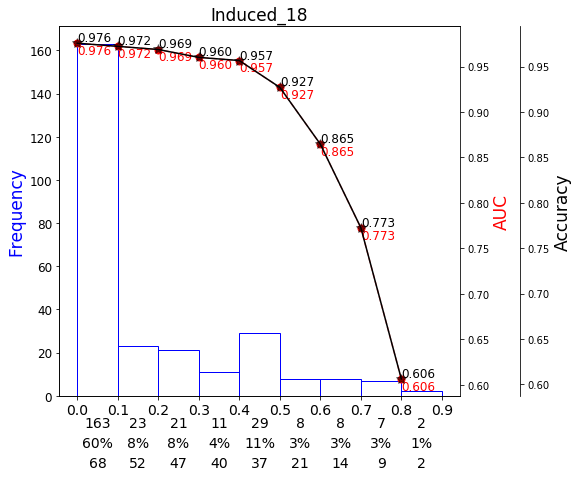

18


,0,1,2
0,bankssts L,lBKS,0.865
1,lateraloccipital R,rLO,0.805
2,parsopercularis L,lPOP,0.785
3,posteriorcingulate L,lPCG,0.76
4,lateralorbitofrontal R,rLOF,0.755
5,superiorparietal R,rSP,0.74
6,caudalmiddlefrontal R,rCMF,0.74
7,inferiorparietal L,lIP,0.73
8,caudalanteriorcingulate R,rCAC,0.72
9,cuneus R,rCUN,0.675


In [61]:
roisc=ur
from matplotlib.ticker import FormatStrFormatter
Th_2_Bins=np.asarray(Bins)
data=clf.scores_
fig, ax = plt.subplots(figsize=(8,6))
fig.subplots_adjust(right=0.75)
#counts, bins, patches = ax.hist(data,10 ,edgecolor='gray')
counts, bins, patches = ax.hist(data,bins=np.round(0.1*np.arange(0,10),2),facecolor="None",edgecolor='blue', lw=1)
# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 1 decimal place...
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14) 
bin_centers = 0.5 * np.diff(bins) + bins[:-1]

#show % value
for count, x,rois in zip(counts, bin_centers,roisc):
    # Label the raw counts
    ax.annotate(int(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -20), fontsize=14,textcoords='offset points', va='top', ha='center')

    # Label the percentages
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, -40), fontsize=14,textcoords='offset points', va='top', ha='center')
    # ROIs
    ax.annotate(rois, xy=(x, 0), xycoords=('data', 'axes fraction'),
    xytext=(0, -60),fontsize=14, textcoords='offset points', va='top', ha='center')
    
    # Give ourselves some more room at the bottom of the plot

ax2 = ax.twinx()
ax2.plot(Th_2_Bins,AUC_Th2, color='red',ls='dashed',alpha=0.5)#,THbin,CCC_Per)
ax2.set_frame_on(False)
ax2.set_ylabel('AUC', color='red',fontsize=17)
ax2.patch.set_visible(False)
for i,j in zip(Th_2_Bins,AUC_Th2):
    #ax2.annotate(("%.2f" % j),xy=(i+0.04,j-0.01), color ='red') ##############################
    ax2.annotate(("%.3f" % j),xy=(i,j-0.012), color ='red',fontsize=12) ##############################
    ax2.plot(i,j, marker='o', markersize=7, color="red")

    
ax3 = ax.twinx()
ax3.plot(Th_2_Bins,ACC_Th2, color='black')#,THbin,CCC_Per)
ax3.set_frame_on(False)
ax3.set_ylabel('Accuracy', color='black',fontsize=17)



for i,j in zip(Th_2_Bins,ACC_Th2):
     #ax3.annotate(("%0.2f" % j),xy=(i-0.05,j), color='black')
    #ax3.annotate(("%0.2f" % j),xy=(i-0.1,j), color='black')##################################
    ax3.annotate(("%0.3f" % j),xy=(i,j+0.002), color='black',fontsize=12)##################################
    ax3.plot(i,j, marker='*', markersize=10, color="black",alpha=0.5)
    #ax3.annotate(("%0.2f,%0.2f" % (i,j)),xy=(i-0.05,j), color='green')
    #ax3.annotate(("%0.3f" %j),xy=(i,j), color='green')
    
    
# Move the last y-axis spine over to the right by 20% of the width of the axes
ax3.spines['right'].set_position(('axes', 1.15))
ax3.spines['right'].set_visible(True)

# To make the border of the right-most axis visible, we need to turn the frame
# on. This hides the other plots, however, so we need to turn its fill off.
ax3.set_frame_on(True)
ax3.patch.set_visible(False)

#ax.plot(bins,np.linspace(0,1,11))
plt.subplots_adjust(bottom=.15)
plt.grid(False,which='both')
ax.set_ylabel('Frequency',fontsize=17)
ax.yaxis.label.set_color('Blue')
# plt.title("Induced", fontsize=20)
plt.title("Induced_"+str(rs), fontsize=17)
plt.tight_layout()
# #Save the image
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(12)
filename='StabilitySelection_clear'
save_format='png'
#print filename+'.'+save_format
#pp='home/ralfahad/Pictures'
#plt.savefig(filename+'.'+save_format,dpi=100)
# plt.savefig(filename+'.'+save_format,dpi=300, bbox_inches='tight')
plt.show()
print (rs)
alluR

## The enddddddddddddddddddddddddddddddddddddddd

In [62]:
rs

18

## For finding the selected ROIs

In [63]:
# Rank the Features according to the importance
names=range(0,X.shape[1]) # Feature names used as 1-1428 features
cn=np.asarray(names) # converted as numpy.ndarray
# print "Features sorted by their score:"
b= sorted(zip(map(lambda x: round(x, 4), clf.scores_), cn), reverse=True)
# print b
bb=np.asarray(b)
rakfe=bb[bb[:,0]>=Th_2_Bins[6]]
# rakfe=bb[bb[:,0]>=.50]
ranksl=rakfe[:,1]; #This is the actual index of the sorted data
ROIs=rakfe[:,1]%68
print("Actual index:",ranksl)
print ROIs
print ('Features:',len(ROIs))
print ('uniq ROI:',len(np.unique(ROIs)))

('Actual index:', array([ 68., 227.,  36.,  46., 229., 263., 209.,  82.,   3., 211., 150.,
       141., 116., 228., 218., 203., 188.]))
[ 0. 23. 36. 46. 25. 59.  5. 14.  3.  7. 14.  5. 48. 24. 14. 67. 52.]
('Features:', 17)
('uniq ROI:', 14)


In [64]:
for i in ROIs:
    print (i,np.where(ROIs==i)) 

(0.0, (array([0]),))
(23.0, (array([1]),))
(36.0, (array([2]),))
(46.0, (array([3]),))
(25.0, (array([4]),))
(59.0, (array([5]),))
(5.0, (array([ 6, 11]),))
(14.0, (array([ 7, 10, 14]),))
(3.0, (array([8]),))
(7.0, (array([9]),))
(14.0, (array([ 7, 10, 14]),))
(5.0, (array([ 6, 11]),))
(48.0, (array([12]),))
(24.0, (array([13]),))
(14.0, (array([ 7, 10, 14]),))
(67.0, (array([15]),))
(52.0, (array([16]),))


## Delete the repeated ROIs and find the unique ROIs

In [65]:
unqorg1=ranksl
unr_ss=np.delete(unqorg1,[10,11,14])
unr_ss

array([ 68., 227.,  36.,  46., 229., 263., 209.,  82.,   3., 211., 116.,
       228., 203., 188.])

In [66]:
ROIs=unr_ss%68
rss=dkfull[ROIs]
pd.DataFrame(rss.values)

,0
0,bankssts L
1,lateraloccipital R
2,parsopercularis L
3,posteriorcingulate L
4,lateralorbitofrontal R
5,superiorparietal R
6,caudalmiddlefrontal R
7,inferiorparietal L
8,caudalanteriorcingulate R
9,cuneus R


In [67]:
len(ROIs)

14

In [68]:
# len(ranksl[np.where(ranksl>68*3-1)])

In [69]:
# [ranksl>68]
rrs=ranksl[np.where(unr_ss>68*3-1)]
# len(ranksl[np.where(ranksl<((68*1-1) and (68*2-1)))])
roisf=rrs%68
print ('acctual:',rrs)
print (roisf)

('acctual:', array([227., 229., 263., 209., 211., 141.]))
[23. 25. 59.  5.  7.  5.]


In [70]:
# r=np.arange(0,16)
# # r[r>(5 and 8)]

In [71]:
dk1=dkfull[roisf]
print dk1.head(10)
dk11=pd.DataFrame(dk1)

23.0        lateraloccipital R
25.0    lateralorbitofrontal R
59.0        superiorparietal R
5.0      caudalmiddlefrontal R
7.0                   cuneus R
5.0      caudalmiddlefrontal R
Name: BrainMesh_ICBM152.nv, dtype: object


In [72]:
# alluR

In [73]:
# reg=68
# r=np.arange(0,68*4)
# the=r[r<=reg*1-1]
# alp=r[np.bitwise_and(r>reg*1-1,r<=reg*2-1)]
# bet=r[np.bitwise_and(r>reg*2-1,r<=reg*3-1)]
# gam=r[r>=reg*3]
# print (the,alp,bet,gam)
# # r[np.bitwise_and(r>12,r<12)]
# # r[r>(5 and 8)]

In [74]:
# unr_ss is the unique ROIs
r=unr_ss

In [75]:
reg=68
# r=np.arange(0,68*4)
the=r[r<=reg*1-1]
alp=r[np.bitwise_and(r>reg*1-1,r<=reg*2-1)]
bet=r[np.bitwise_and(r>reg*2-1,r<=reg*3-1)]
gam=r[r>=reg*3]
print (the,alp,bet,gam)
# print (len(the%68),len(alp%68),len(bet),len(gam))
print (len(the),len(alp),len(bet),len(gam))
# r[np.bitwise_and(r>12,r<12)]
# r[r>(5 and 8)]

(array([36., 46.,  3.]), array([ 68.,  82., 116.]), array([203., 188.]), array([227., 229., 263., 209., 211., 228.]))
(3, 3, 2, 6)


In [76]:
print (dkfull[the%68], dkfull[alp%68], dkfull[bet%68] ,dkfull[gam%68])

(36.0            parsopercularis L
46.0         posteriorcingulate L
3.0     caudalanteriorcingulate R
Name: BrainMesh_ICBM152.nv, dtype: object, 0.0             bankssts L
14.0    inferiorparietal L
48.0          precentral L
Name: BrainMesh_ICBM152.nv, dtype: object, 67.0          transversetemporal R
52.0    rostralanteriorcingulate L
Name: BrainMesh_ICBM152.nv, dtype: object, 23.0        lateraloccipital R
25.0    lateralorbitofrontal R
59.0        superiorparietal R
5.0      caudalmiddlefrontal R
7.0                   cuneus R
24.0    lateralorbitofrontal L
Name: BrainMesh_ICBM152.nv, dtype: object)


In [77]:
# sn.iloc[0:17,:]
alluR.iloc[0:14,:]

,0,1,2
0,bankssts L,lBKS,0.865
1,lateraloccipital R,rLO,0.805
2,parsopercularis L,lPOP,0.785
3,posteriorcingulate L,lPCG,0.76
4,lateralorbitofrontal R,rLOF,0.755
5,superiorparietal R,rSP,0.74
6,caudalmiddlefrontal R,rCMF,0.74
7,inferiorparietal L,lIP,0.73
8,caudalanteriorcingulate R,rCAC,0.72
9,cuneus R,rCUN,0.675


## Behavioral analysisstart from here

In [78]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import statsmodels.api as sm

In [79]:
dbeh_path="/home/sultan/EEG_CP/WAVELET_SPECTROGRAM/Behavioral_Analysis_Evk_Ind/ind_spectral_beh_allfreq_ex_S16_25.csv"
# dpath="/home/sultan/EEG_CP/Behavioral_Analysis/Fianl_raw_erp_beh_data.csv"
# dpath="/home/sultan/EEG_CP/Behavioral_Analysis/Fianl_erp_beh_data1.csv"
data= pd.read_csv(dbeh_path)
corel=data.corr(method='pearson')
data.head(3)

,0,1,2,3,4,5,6,7,8,9,...,263,264,265,266,267,268,269,270,271,272
0,3.497053,2.616760e-10,2.332298e-10,4.943851e-10,5.813167e-10,1.145732e-10,8.177037e-10,1.731854e-10,1.809210e-10,9.220449e-10,...,1.278519e-11,2.486241e-11,1.001228e-10,1.389097e-10,2.852974e-11,6.205560e-11,2.436889e-10,2.566658e-10,9.647540e-11,1.362878e-10
1,3.734621,6.011649e-10,1.466887e-09,8.015002e-10,8.911338e-10,6.554139e-10,9.983100e-10,6.079106e-10,4.024843e-10,3.828943e-09,...,2.468937e-11,3.618688e-11,2.099646e-10,4.205829e-10,4.166388e-11,1.262459e-10,6.648568e-10,9.725904e-10,2.518486e-10,3.766805e-10
2,2.866396,9.976802e-10,1.075942e-09,7.459019e-10,8.260322e-10,3.288374e-10,4.210073e-10,8.669916e-10,7.745771e-10,2.123558e-09,...,1.339596e-10,1.774123e-10,1.664857e-10,2.772665e-10,1.186471e-10,6.444655e-11,4.502527e-10,3.949738e-10,1.235222e-10,1.992414e-10


In [80]:
rrc=data.iloc[:,0]
# rrc=data.iloc[:,ranksl+1]
rrc.head(2)

0    3.497053
1    3.734621
Name: 0, dtype: float64

In [81]:
min(data)

'0'

In [82]:
# dk1=dkfull[roisf]

In [83]:
# dkfull[gam%68]

In [84]:
# dk_ss=dkfull[ROIs]
# dk_ss

In [85]:
# dk_ss1=dkfull[(ranksl)%68]
# dk_ss1

In [86]:
beh_roi_sc=np.append(0,unr_ss+1)
data_beh_roisc=data.iloc[:,beh_roi_sc]
data_beh_roisc.shape

(48, 15)

In [87]:
# dk_ss=dkfull[ROIs]
# list(dk_ss)

### ROIs and Slope label adding

In [88]:
# data=pd.read_csv(dpath);
data=data_beh_roisc
datacolum=data; ## Takinhg the main data 
## For addixng the column name we make it list
dk_ss=dkfull[ROIs]; ## Taking the selected brain ROIs
clname=list(dk_ss); ##v making it into list
clname.insert(0,'Beha. slope'); ## Addinxg the behav. slop at the first index
len(clname)
clname

['Beha. slope',
 '       bankssts L',
 'lateraloccipital R',
 'parsopercularis L',
 'posteriorcingulate L',
 'lateralorbitofrontal R',
 'superiorparietal R',
 'caudalmiddlefrontal R',
 'inferiorparietal L',
 'caudalanteriorcingulate R',
 '         cuneus R',
 '     precentral L',
 'lateralorbitofrontal L',
 'transversetemporal R',
 'rostralanteriorcingulate L']

In [89]:
ddtest=data
ddtest.head(2)

,0,69,228,37,47,230,264,210,83,4,212,117,229,204,189
0,3.497053,2.171247e-10,3.281356e-11,1.859475e-10,3.883698e-10,1.708311e-10,2.486241e-11,1.253636e-10,7.001352e-11,5.813167e-10,3.046734e-11,1.276535e-10,2.326437e-10,2.988473e-10,4.638290e-10
1,3.734621,4.579277e-10,6.122221e-11,1.437187e-09,7.721816e-10,5.112485e-10,3.618688e-11,1.852360e-10,2.284847e-10,8.911338e-10,5.369026e-11,7.669481e-10,3.117271e-10,8.410269e-10,6.724634e-10


In [90]:
ddtest.columns=clname
ddtest.head(3)

,Beha. slope,bankssts L,lateraloccipital R,parsopercularis L,posteriorcingulate L,lateralorbitofrontal R,superiorparietal R,caudalmiddlefrontal R,inferiorparietal L,caudalanteriorcingulate R,cuneus R,precentral L,lateralorbitofrontal L,transversetemporal R,rostralanteriorcingulate L
0,3.497053,2.171247e-10,3.281356e-11,1.859475e-10,3.883698e-10,1.708311e-10,2.486241e-11,1.253636e-10,7.001352e-11,5.813167e-10,3.046734e-11,1.276535e-10,2.326437e-10,2.988473e-10,4.638290e-10
1,3.734621,4.579277e-10,6.122221e-11,1.437187e-09,7.721816e-10,5.112485e-10,3.618688e-11,1.852360e-10,2.284847e-10,8.911338e-10,5.369026e-11,7.669481e-10,3.117271e-10,8.410269e-10,6.724634e-10
2,2.866396,7.757514e-10,1.280618e-10,3.095912e-10,1.086266e-09,5.009364e-10,1.774123e-10,6.872571e-11,1.094463e-09,8.260322e-10,1.595771e-10,7.203327e-10,2.302279e-10,4.952630e-10,6.448233e-10


## Simply ordinary rdinary least squares

In [91]:
y=ddtest.iloc[:,0]
variable=ddtest.iloc[:,1:]*1e9
variable
model = sm.OLS(y, variable).fit()
predictions = model.predict(variable) # make the predictions by the model
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Beha. slope   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     3.025
Date:                Tue, 15 Sep 2020   Prob (F-statistic):            0.00418
Time:                        15:37:38   Log-Likelihood:                -134.10
No. Observations:                  48   AIC:                             296.2
Df Residuals:                      34   BIC:                             322.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
       bankssts L              0.0511      1.572      0.033      0.974      -3.143       3.245
lateraloccipital R             7.6004      9.582      0.793      0.433     -11.873      27.074
parsopercularis L              0.8557      1.697      0.504      0.617      -2.593       4.304
posteriorcingulate L          -3.4496      2.001     -1.724      0.094      -7.516       0.617
lateralorbitofrontal R         0.7474      5.133      0.146      0.885      -9.685      11.180
superiorparietal R            32.3931     19.098      1.696      0.099      -6.419      71.205
caudalmiddlefrontal R         -5.4815      8.898     -0.616      0.542     -23.564      12.601
inferiorparietal L             0.4328      2.101      0.206      0.838      -3.838       4.703
caudalanteriorcingulate R      3.8043      2.489      1.529      0.136      -1.253       8.862
         cuneus R              0.1171     15.187      0.008      0.994     -30.747      30.981
     precentral L             -3.6519      2.936     -1.244      0.222      -9.618       2.314
lateralorbitofrontal L        -0.2964      6.292     -0.047      0.963     -13.082      12.490
transversetemporal R           0.4913      2.081      0.236      0.815      -3.738       4.720
rostralanteriorcingulate L     1.0031      3.619      0.277      0.783      -6.352       8.359
==============================================================================
Omnibus:                       64.145   Durbin-Watson:                   1.784
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              596.279
Skew:                           3.337   Prob(JB):                    3.31e-130
Kurtosis:                      18.925   Cond. No.                         123.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### WLS

In [92]:
ols_model=sm.OLS(y, variable).fit()
# wr=ols_model.fittedvalues
wr=ols_model.resid
# wr=ols_model.fittedvalues
w=np.asarray(wr)
wls_model = sm.WLS(y,variable,weights=1/abs(w)).fit()
# wls_model = sm.WLS(y,variable,weights=1).fit()
# wls_model = sm.WLS(y,variable_mlr,weights=abs(w)).fit()
# wls_model = sm.WLS(y,variable_mlr,weights=1).fit()
# wls_model = sm.WLS(y, variable_mlr,weights=list(range(1,len(y)+1))).fit()
predictions =wls_model.predict(variable) # make the predictions by the model
# Print out the statistics
# print (wls_model.summary())
wls_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:            Beha. slope   R-squared:                       0.959
Model:                            WLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     56.17
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           2.49e-19
Time:                        15:37:38   Log-Likelihood:                -93.523
No. Observations:                  48   AIC:                             215.0
Df Residuals:                      34   BIC:                             241.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
       bankssts L              0.2617      0.665      0.394      0.696      -1.089       1.612
lateraloccipital R             6.2996      4.402      1.431      0.162      -2.647      15.246
parsopercularis L              0.5960      0.592      1.007      0.321      -0.607       1.799
posteriorcingulate L          -2.8525      0.798     -3.575      0.001      -4.474      -1.231
lateralorbitofrontal R         1.0819      1.796      0.602      0.551      -2.569       4.733
superiorparietal R            21.2269      9.046      2.347      0.025       2.843      39.610
caudalmiddlefrontal R         -6.3994      3.782     -1.692      0.100     -14.085       1.286
inferiorparietal L             0.6016      0.915      0.658      0.515      -1.257       2.461
caudalanteriorcingulate R      3.3409      0.991      3.370      0.002       1.326       5.356
         cuneus R              3.7221      5.121      0.727      0.472      -6.685      14.129
     precentral L             -3.5882      1.200     -2.991      0.005      -6.026      -1.150
lateralorbitofrontal L        -1.4324      2.966     -0.483      0.632      -7.459       4.594
transversetemporal R           0.1056      0.731      0.144      0.886      -1.381       1.592
rostralanteriorcingulate L     1.9560      1.305      1.499      0.143      -0.696       4.608
==============================================================================
Omnibus:                        4.822   Durbin-Watson:                   1.469
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                4.012
Skew:                           0.701   Prob(JB):                        0.135
Kurtosis:                       3.205   Cond. No.                         276.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## for gamm band only

In [93]:
# data= pd.read_csv(dbeh_path)
# beh_gmroi_sc=np.append(0,gam+1)
# data_gmbeh=data.iloc[:,beh_gmroi_sc]
# data_gmbeh.shape

In [94]:
## the 

In [95]:
# data=data_gmbeh
# gm_data=data; ## Takinhg the main data 
# ## For addixng the column name we make it list
# dk_ss=dkfull[gam%68]; ## Taking the selected brain ROIs
# gm_clname=list(dk_ss); ##v making it into list
# gm_clname.insert(0,'Beha. slope'); ## Addinxg the behav. slop at the first index
# len(gm_clname)
# gm_clname

In [96]:
# gm_data.columns=gm_clname
# gm_data.head(3)

In [97]:
# y_gm=gm_data.iloc[:,0]
# variable_gm=gm_data.iloc[:,1:]*1e9
# variable_gm
# model = sm.OLS(y_gm, variable_gm).fit()
# predictions = model.predict(variable_gm) # make the predictions by the model
# # Print out the statistics
# model.summary()

In [98]:
# y_gm=gm_data.iloc[:,0]
# variable_gm=gm_data.iloc[:,1:]*1e9
# variable_gm
# model = sm.OLS(y_gm, variable_gm).fit()
# predictions = model.predict(variable_gm) # make the predictions by the model
# # Print out the statistics
# model.summary()

In [99]:
# ols_model=sm.OLS(y_gm, variable_gm).fit()
# # wr=ols_model.fittedvalues
# wr=ols_model.resid
# # wr=ols_model.fittedvalues
# w=np.asarray(wr)
# wls_model = sm.WLS(y_gm,variable_gm,weights=1/abs(w)).fit()
# # wls_model = sm.WLS(y,variable_mlr,weights=abs(w)).fit()
# # wls_model = sm.WLS(y,variable_mlr,weights=1).fit()
# # wls_model = sm.WLS(y, variable_mlr,weights=list(range(1,len(y)+1))).fit()
# predictions =wls_model.predict(variable_gm) # make the predictions by the model
# # Print out the statistics
# print (wls_model.summary())

In [100]:
# ols_model=sm.OLS(y, variable).fit()
# # wr=ols_model.fittedvalues
# wr=ols_model.resid
# # wr=ols_model.fittedvalues
# w=np.asarray(wr)
# wls_model = sm.WLS(y,variable,weights=1/abs(w)).fit()
# # wls_model = sm.WLS(y,variable_mlr,weights=abs(w)).fit()
# # wls_model = sm.WLS(y,variable_mlr,weights=1).fit()
# # wls_model = sm.WLS(y, variable_mlr,weights=list(range(1,len(y)+1))).fit()
# predictions =wls_model.predict(variable) # make the predictions by the model
# # Print out the statistics
# print (wls_model.summary())

### Theta

In [101]:
the

array([36., 46.,  3.])

In [102]:
data= pd.read_csv(dbeh_path)
beh_the_sc=np.append(0,the+1)
data_thebe_sc=data.iloc[:,beh_the_sc]
data_thebe_sc.shape
## Ading column
dk_ss=dkfull[the%68]; ## Taking the selected brain ROIs
th_clname=list(dk_ss); ##v making it into list
th_clname.insert(0,'Beha. slope'); ## Addinxg the behav. slop at the first index
len(th_clname)
th_clname
data_thebe_sc.columns=th_clname
y_th=data_thebe_sc.iloc[:,0]
variable_th=data_thebe_sc.iloc[:,1:]*1e9
variable_th

ols_model=sm.OLS(y_th, variable_th).fit()
# wr=ols_model.fittedvalues
wr=ols_model.resid
# wr=ols_model.fittedvalues
w=np.asarray(wr)
wls_model = sm.WLS(y_th,variable_th,weights=1/abs(w)).fit()
# wls_model = sm.WLS(y_th,variable_th,weights=1).fit()
# wls_model = sm.WLS(y,variable_mlr,weights=abs(w)).fit()
# wls_model = sm.WLS(y,variable_mlr,weights=1).fit()
# wls_model = sm.WLS(y, variable_mlr,weights=list(range(1,len(y)+1))).fit()
predictions =wls_model.predict(variable_th) # make the predictions by the model
# Print out the statistics
print (wls_model.summary())

                            WLS Regression Results                            
Dep. Variable:            Beha. slope   R-squared:                       0.807
Model:                            WLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     62.64
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           4.23e-16
Time:                        15:37:40   Log-Likelihood:                -103.19
No. Observations:                  48   AIC:                             212.4
Df Residuals:                      45   BIC:                             218.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
parsopercularis L     

## Alpha

In [103]:
the=alp
data= pd.read_csv(dbeh_path)
beh_the_sc=np.append(0,the+1)
data_thebe_sc=data.iloc[:,beh_the_sc]
data_thebe_sc.shape
## Ading column
dk_ss=dkfull[the%68]; ## Taking the selected brain ROIs
th_clname=list(dk_ss); ##v making it into list
th_clname.insert(0,'Beha. slope'); ## Addinxg the behav. slop at the first index
len(th_clname)
th_clname
data_thebe_sc.columns=th_clname
y_th=data_thebe_sc.iloc[:,0]
variable_th=data_thebe_sc.iloc[:,1:]*1e9
variable_th


ols_model=sm.OLS(y_th, variable_th).fit()
# wr=ols_model.fittedvalues
wr=ols_model.resid
# wr=ols_model.fittedvalues
w=np.asarray(wr)
wls_model = sm.WLS(y_th,variable_th,weights=1/abs(w)).fit()
# wls_model = sm.WLS(y_th,variable_th,weights=1).fit()
# wls_model = sm.WLS(y,variable_mlr,weights=abs(w)).fit()
# wls_model = sm.WLS(y,variable_mlr,weights=1).fit()
# wls_model = sm.WLS(y, variable_mlr,weights=list(range(1,len(y)+1))).fit()
predictions =wls_model.predict(variable_th) # make the predictions by the model
# Print out the statistics
print (wls_model.summary())

                            WLS Regression Results                            
Dep. Variable:            Beha. slope   R-squared:                       0.746
Model:                            WLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     44.13
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           1.87e-13
Time:                        15:37:40   Log-Likelihood:                -106.27
No. Observations:                  48   AIC:                             218.5
Df Residuals:                      45   BIC:                             224.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
       bankssts L      0.6455      0

### Beta

In [104]:
the=bet
data= pd.read_csv(dbeh_path)
beh_the_sc=np.append(0,the+1)
data_thebe_sc=data.iloc[:,beh_the_sc]
data_thebe_sc.shape
## Ading column
dk_ss=dkfull[the%68]; ## Taking the selected brain ROIs
th_clname=list(dk_ss); ##v making it into list
th_clname.insert(0,'Beha. slope'); ## Addinxg the behav. slop at the first index
len(th_clname)
th_clname
data_thebe_sc.columns=th_clname
y_th=data_thebe_sc.iloc[:,0]
variable_th=data_thebe_sc.iloc[:,1:]*1e9
variable_th


ols_model=sm.OLS(y_th, variable_th).fit()
# wr=ols_model.fittedvalues
wr=ols_model.resid
# wr=ols_model.fittedvalues
w=np.asarray(wr)
wls_model = sm.WLS(y_th,variable_th,weights=1/abs(w)).fit()
# wls_model = sm.WLS(y_th,variable_th,weights=1).fit()
# wls_model = sm.WLS(y,variable_mlr,weights=abs(w)).fit()
# wls_model = sm.WLS(y,variable_mlr,weights=1).fit()
# wls_model = sm.WLS(y, variable_mlr,weights=list(range(1,len(y)+1))).fit()
predictions =wls_model.predict(variable_th) # make the predictions by the model
# Print out the statistics
print (wls_model.summary())

                            WLS Regression Results                            
Dep. Variable:            Beha. slope   R-squared:                       0.876
Model:                            WLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     163.1
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           1.30e-21
Time:                        15:37:40   Log-Likelihood:                -101.30
No. Observations:                  48   AIC:                             206.6
Df Residuals:                      46   BIC:                             210.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
transversetemporal R

## Gamma

In [105]:
the=gam
data= pd.read_csv(dbeh_path)
beh_the_sc=np.append(0,the+1)
data_thebe_sc=data.iloc[:,beh_the_sc]
data_thebe_sc.shape
## Ading column
dk_ss=dkfull[the%68]; ## Taking the selected brain ROIs
th_clname=list(dk_ss); ##v making it into list
th_clname.insert(0,'Beha. slope'); ## Addinxg the behav. slop at the first index
len(th_clname)
th_clname
data_thebe_sc.columns=th_clname
y_th=data_thebe_sc.iloc[:,0]
variable_th=data_thebe_sc.iloc[:,1:]*1e9
variable_th


ols_model=sm.OLS(y_th, variable_th).fit()
# wr=ols_model.fittedvalues
wr=ols_model.resid
# wr=ols_model.fittedvalues
w=np.asarray(wr)
wls_model = sm.WLS(y_th,variable_th,weights=1/abs(w*1)).fit()
# wls_model = sm.WLS(y_th,variable_th,weights=1).fit()
# wls_model = sm.WLS(y,variable_mlr,weights=abs(w)).fit()
# wls_model = sm.WLS(y,variable_mlr,weights=1).fit()
# wls_model = sm.WLS(y, variable_mlr,weights=list(range(1,len(y)+1))).fit()
predictions =wls_model.predict(variable_th) # make the predictions by the model
# Print out the statistics
print (wls_model.summary())

                            WLS Regression Results                            
Dep. Variable:            Beha. slope   R-squared:                       0.915
Model:                            WLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     75.30
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           7.13e-21
Time:                        15:37:40   Log-Likelihood:                -97.358
No. Observations:                  48   AIC:                             206.7
Df Residuals:                      42   BIC:                             217.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
lateraloccipital R         0